In [1]:
library(lattice) 
library(lme4) #glm and random effect
library(DHARMa) #simulating residuals
library(glmmTMB) #beta regression with mixed effects
library(sjPlot) #tabmodel

Loading required package: Matrix

This is DHARMa 0.3.3.0. For overview type '?DHARMa'. For recent changes, type news(package = 'DHARMa') Note: Syntax of plotResiduals has changed in 0.3.0, see ?plotResiduals for details

Warning message:
"package 'glmmTMB' was built under R version 4.0.4"
Warning message:
"package 'sjPlot' was built under R version 4.0.4"
Install package "strengejacke" from GitHub (`devtools::install_github("strengejacke/strengejacke")`) to load all sj-packages at once!



# Weather

In [2]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/CleaningAnalysis_/Cleaning/Raw&Cleaned'
df = read.csv(file.path(path_,'environmentalfactorestimatederrorrate.csv'), header = TRUE, sep = ";")
df$hour = as.integer(df$hour)   
df$PenID = as.factor(df$PenID) 
df$system = as.factor(df$system) 
df$humidity_divided_by_10 = df$humidity_avgpercent/10
print(dim(df))
summary(df)

[1] 2614   12


 Timestamp_weather      PenID          hour           system   
 Length:2614        pen8   :336   Min.   :10.00   10 - 12:997  
 Class :character   pen9   :336   1st Qu.:11.00   3 - 5  :945  
 Mode  :character   pen12  :334   Median :13.00   8 - 9  :672  
                    pen10  :332   Mean   :12.52                
                    pen11  :331   3rd Qu.:14.00                
                    pen4   :321   Max.   :15.00                
                    (Other):624                                
  prediction        temperature_C    humidity_avgpercent      IFR        
 Length:2614        Min.   :-6.000   Min.   : 49.00      Min.   : 0.000  
 Class :character   1st Qu.: 1.000   1st Qu.: 72.00      1st Qu.: 0.000  
 Mode  :character   Median : 2.000   Median : 84.00      Median : 1.000  
                    Mean   : 3.062   Mean   : 83.22      Mean   : 2.083  
                    3rd Qu.: 5.000   3rd Qu.: 97.00      3rd Qu.: 2.000  
                    Max.   :14.000   Max.   

In [3]:
#Generalized linear mixed effect model
fit = glmer(cbind(IFR,nbr.registrations-IFR) ~ humidity_divided_by_10 + temperature_C + hour + estimated.transitions + (1|system/PenID), 
            family=binomial(link=logit), data=df)
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(IFR, nbr.registrations - IFR) ~ humidity_divided_by_10 +  
    temperature_C + hour + estimated.transitions + (1 | system/PenID)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  6285.9   6327.0  -3135.9   6271.9     2607 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5705 -0.7723 -0.4595  0.5591  4.5552 

Random effects:
 Groups       Name        Variance Std.Dev.
 PenID:system (Intercept) 0.0471   0.217   
 system       (Intercept) 1.1302   1.063   
Number of obs: 2614, groups:  PenID:system, 8; system, 3

Fixed effects:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -0.562605   0.648293  -0.868    0.385    
humidity_divided_by_10 -0.054922   0.012964  -4.237 2.27e-05 ***
temperature_C          -0.027616   0.004600  -6.003 1.93e-09 ***
hour                   -0.010535   0.010816 

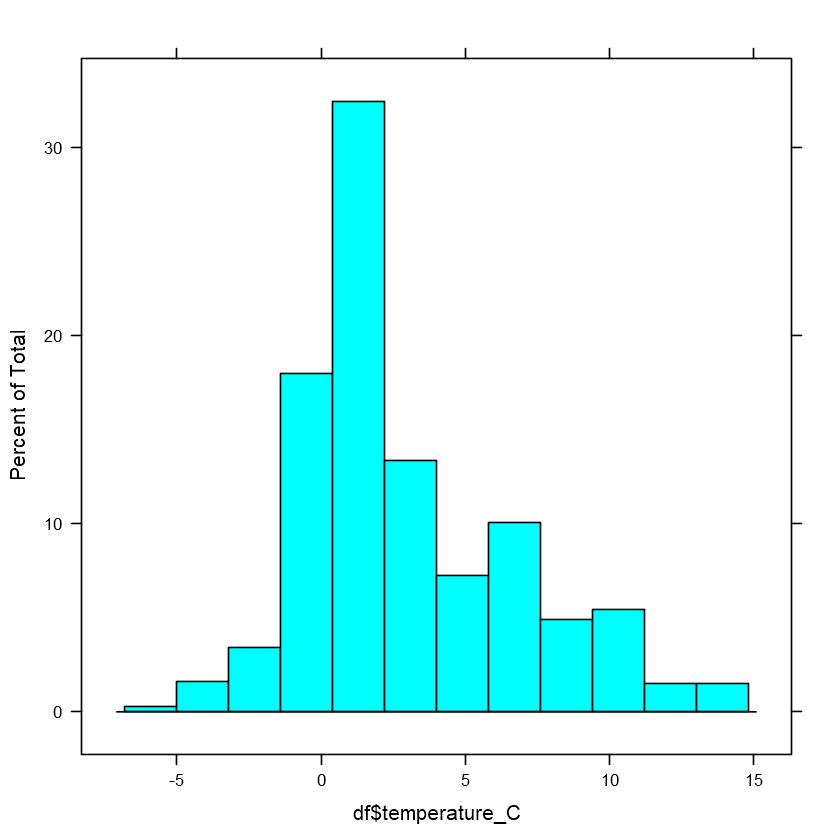

In [4]:
histogram(df$temperature_C)

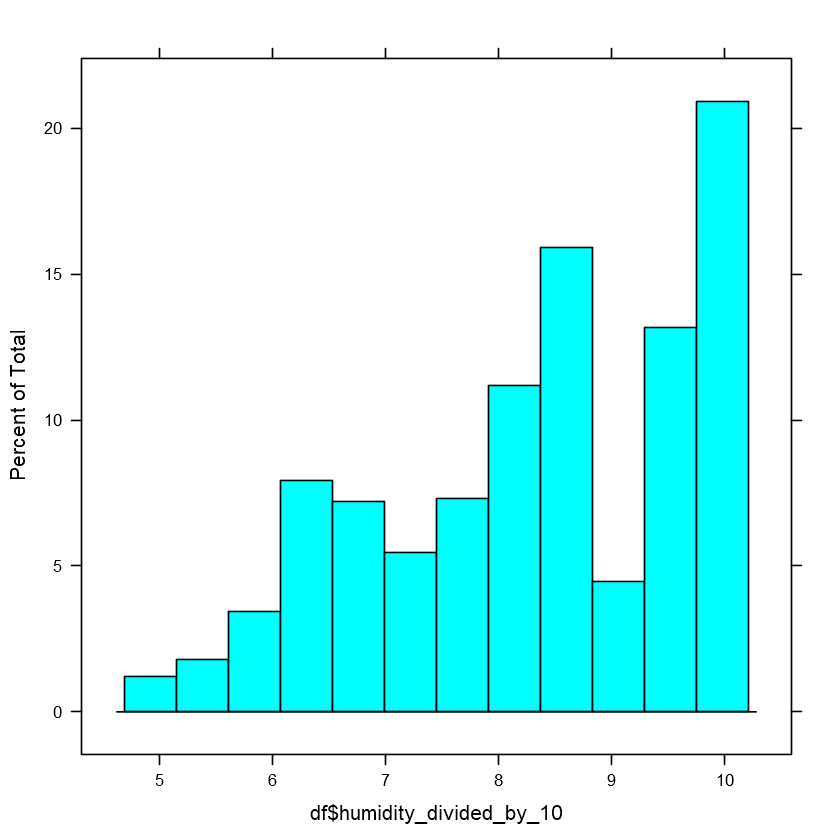

In [5]:
histogram(df$humidity_divided_by_10)

In [6]:
#save output for paper
#odds interpretations example: https://stackoverflow.com/questions/41384075/r-calculate-and-interpret-odds-ratio-in-logistic-regression
tab_model(fit, file=file.path(path_,'Weather.html'))

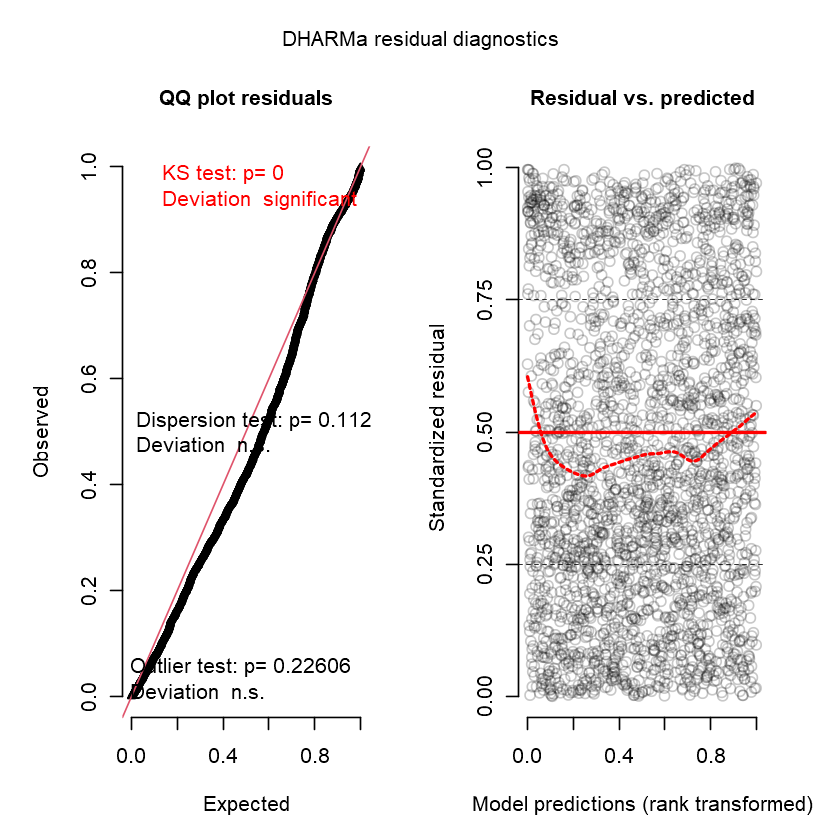

In [7]:
#https://cran.r-project.org/web/packages/glmmTMB/vignettes/model_evaluation.pdf
library(DHARMa)
res <- simulateResiduals(fit)
plot(res)

# Estimated number of transitions

In [8]:
path_ = 'G:/VPHI/Welfare/2- Research Projects/OFHE2.OriginsE2/DataOutput/TrackingSystem/CleaningAnalysis_/Cleaning/Raw&Cleaned'
df = read.csv(file.path(path_,'estimatednumbertransitionsestimatederrorrate.csv'), header = TRUE, sep = ";")
df$HenID = as.factor(df$HenID) 
df$PenID = as.factor(df$PenID) 
df$system = as.factor(df$system) 
df$level = as.factor(df$level) 
#6h of WG open
df$Estimated_number_transition_perhour = df$Estimated_number_transition/6
print(dim(df))
summary(df)

[1] 7485   11


     HenID          PenID          system            level     
 hen_1  :  56   pen4   : 972   10 - 12:2863   2020-11-14: 138  
 hen_10 :  56   pen3   : 965   3 - 5  :2839   2020-11-24: 138  
 hen_105:  56   pen10  : 959   8 - 9  :1783   2021-01-10: 138  
 hen_106:  56   pen9   : 955                  2021-01-11: 138  
 hen_108:  56   pen11  : 953                  2020-11-15: 137  
 hen_111:  56   pen12  : 951                  2020-11-16: 137  
 (Other):7149   (Other):1730                  (Other)   :6659  
  prediction             IFR         nbr.registrations      EER          
 Length:7485        Min.   : 0.000   Min.   :  1.00    Min.   :0.000000  
 Class :character   1st Qu.: 1.000   1st Qu.: 48.00    1st Qu.:0.005814  
 Mode  :character   Median : 2.000   Median : 76.00    Median :0.031746  
                    Mean   : 3.719   Mean   : 77.75    Mean   :0.051831  
                    3rd Qu.: 5.000   3rd Qu.:102.00    3rd Qu.:0.075676  
                    Max.   :51.000   Max.   

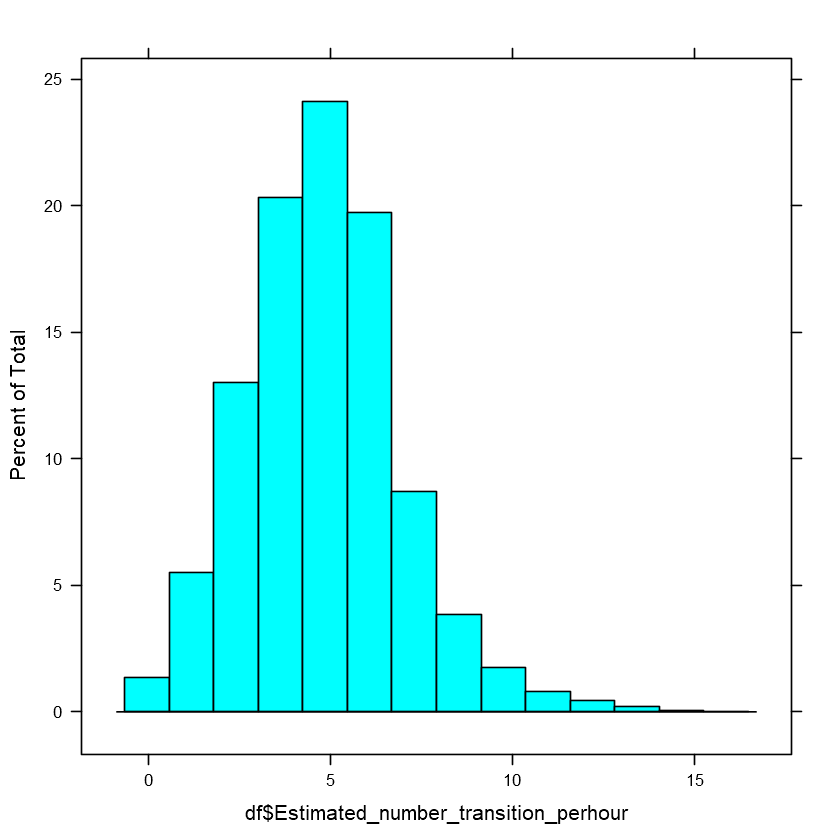

In [9]:
histogram(df$Estimated_number_transition_perhour)

In [10]:
#Generalized linear mixed effect model
fit = glmer(cbind(IFR,nbr.registrations-IFR) ~ Estimated_number_transition_perhour + (1|system/HenID) + (1|level), 
            family=binomial(link=logit), data=df)
summary(fit)

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
cbind(IFR, nbr.registrations - IFR) ~ Estimated_number_transition_perhour +  
    (1 | system/HenID) + (1 | level)
   Data: df

     AIC      BIC   logLik deviance df.resid 
 34377.8  34412.4 -17183.9  34367.8     7480 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1024 -0.9834 -0.3905  0.6816 16.9878 

Random effects:
 Groups       Name        Variance Std.Dev.
 HenID:system (Intercept) 0.87699  0.9365  
 level        (Intercept) 0.02569  0.1603  
 system       (Intercept) 0.11183  0.3344  
Number of obs: 7485, groups:  HenID:system, 140; level, 56; system, 3

Fixed effects:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         -2.885859   0.212022  -13.61   <2e-16 ***
Estimated_number_transition_perhour -0.063802   0.004811  -13.26   <2e-16 ***
---
Signif. codes:  0 '***' 0.00

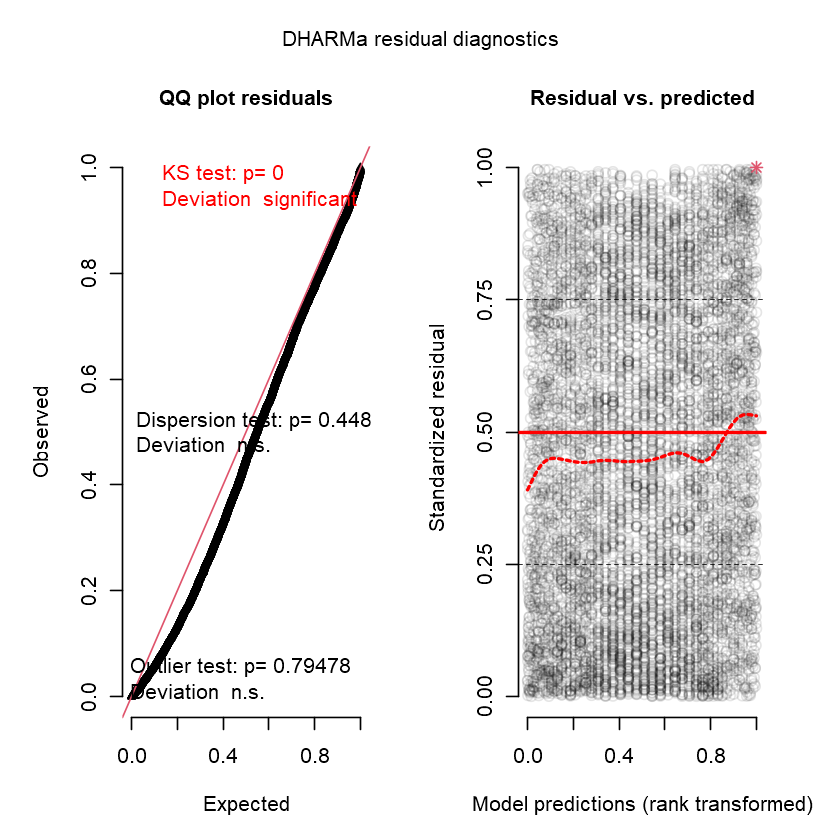

In [11]:
#https://cran.r-project.org/web/packages/glmmTMB/vignettes/model_evaluation.pdf
library(DHARMa)
res <- simulateResiduals(fit)
plot(res)

In [12]:
#save output for paper
tab_model(fit, file=file.path(path_,'numbertransitions.html'))